## Requetes nbre de notices dans une collection pour un auteur

In [57]:
import pandas as pd, json, requests

In [67]:
def req_idhal(year, TAMPID, idhal, subtype) :
    """nombre de publication pour telle année pour tel type de dépôt"""
    req = requests.get(f"http://api.archives-ouvertes.fr/search/{TAMPID}/?q=authIdHal_s:{idhal}&fq=submittedDateY_i:{year}&rows=0")
    req = req.json()
    num = req['response']['numFound']
    return num

In [74]:
def req_idhal_an(year, TAMPID, idhal, subtype) :
    """nombre de publication pour dans la collection"""
    req = requests.get(f"https://api.archives-ouvertes.fr/search/{TAMPID}/?q=authIdHal_s:{idhal}&fq=submittedDateY_i:{year}&fq=submitType_s:{subtype}&rows=0")
    req = req.json()
    tot = req['response']['numFound']
    return tot

Pour quelle collection et quel auteur ?

In [78]:
TAMPID = input("Quel est le TAMPID de la collection ? (en majuscules) : ")
idhal = input("IdHAL : ")
year1 = int (input("Année de départ : "))
year2 = int (input("Année de fin : "))

Quel est le TAMPID de la collection ? (en majuscules) : MATH_ENS_PARIS
IdHAL : gpeyre
Année de départ : 2018
Année de fin : 2023


Récupération des données

In [79]:
totaux = {}
subtypes = ["total"]
for year in range(year1, year2+1):
    totaux[year] = {}
    for st in subtypes :
        tot = req_idhal(year, TAMPID, idhal, st)
        totaux[year][st] = tot

In [80]:
data = {}
subtypes = ["file", "notice", "annex"]
for year in range(year1, year2+1):
    data[year] = {}
    for st in subtypes : 
        num = req_idhal_an(year, TAMPID, idhal, st)
        data[year][st] = num

Transformation en tableau et graphes

In [81]:
dftot = pd.DataFrame.from_dict(totaux)
df = pd.DataFrame.from_dict(data)
dffin = [df, dftot]
dffin = pd.concat(dffin)
dffin

,2018,2019,2020,2021,2022,2023
file,4,2,5,0,1,0
notice,0,6,3,1,0,0
annex,0,0,0,0,0,0
total,4,8,8,1,1,0


<AxesSubplot:>

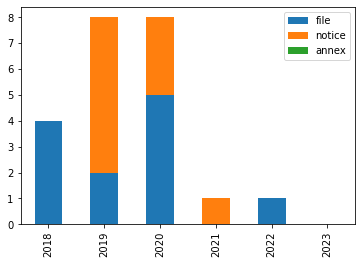

In [82]:
df = df.T # pour inverser colonnes et lignes
df.plot.bar(stacked = True)